In [10]:
from os import remove
import numpy as np
import math
import pandas as pd
pd.options.display.width = 0

In [11]:
dataset = pd.read_excel("DATA SET/Complete Dataset.xlsx")
dataset = dataset.loc[(dataset["DAY OF WEEK"]!="Sunday") & (dataset["DAY OF WEEK"]!= "Saturday")]

cols = ["DATE", "DAY OF WEEK", "MONTH", "D_R_BEANS", "D_R_CARROT", "D_R_CABBAGE", "D_R_TOMATO", "D_W_BEANS", "D_W_CARROT", "D_W_CABBAGE", "D_W_TOMATO"] #, "IS_D_AFTER_HOLIDAY"
dataset = dataset[cols]
dataset = dataset.set_index("DATE")

In [12]:
datasetavgs = dataset.groupby(["DAY OF WEEK"]).mean()
# print(datasetavgs)

for col in cols:
    if( col in["DATE", "DAY OF WEEK", "MONTH", "IS_D_AFTER_HOLIDAY"]):
        continue
    avgVals = datasetavgs[col].to_dict()
    dataset[col] = dataset.apply(lambda row: avgVals[row["DAY OF WEEK"]] if pd.isna(row[col])  else row[col], axis=1 )

array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

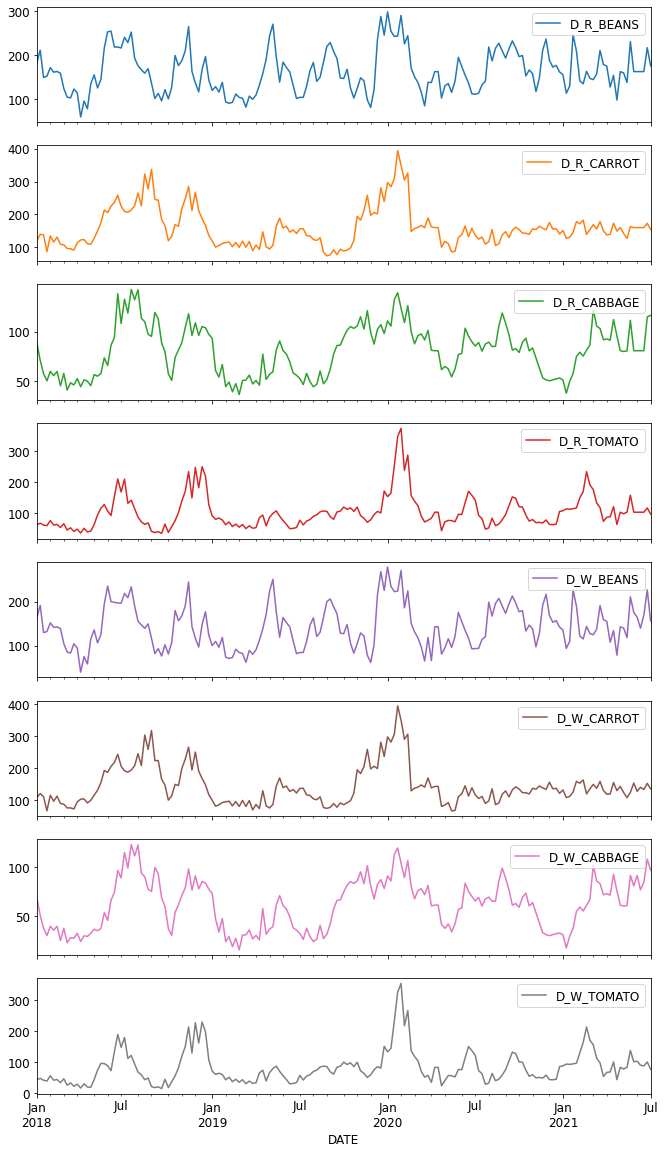

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 12})
dataset.resample("W").mean().plot(figsize=(11,20), fontsize=12, subplots=True )

In [ ]:
dataset = dataset.resample("W").mean()
dataset.to_excel("Null filled then Weekly Averaged Dataset.xlsx")

In [21]:
dataset = pd.read_excel("Complete Dataset.xlsx")

dataset = dataset.loc[(dataset["DAY OF WEEK"]!="Sunday") & (dataset["DAY OF WEEK"]!= "Saturday")]

cols = ["DATE", "D_R_BEANS", "D_R_CARROT", "D_R_CABBAGE", "D_R_TOMATO", "D_W_BEANS", "D_W_CARROT", "D_W_CABBAGE", "D_W_TOMATO"]
dataset = dataset[cols]
dataset = dataset.set_index("DATE")

In [ ]:
dataset.resample("W").mean().plot(figsize=(11,20), fontsize=12, subplots=True )

In [ ]:
dataset = dataset.resample("W").mean()
dataset.to_excel("Null Not filled Weekly Averaged Dataset.xlsx")